##IMPORTING DATASET

In [1]:
#importing pandas to read dataset from drive9
import pandas as pd
#the dataset read is stored as dataframe in df variable
data_frame=pd.read_excel('/content/flight_fare.xlsx')
#gives the number of rows and columns in the dataset
data_frame.shape

(10683, 11)

In [2]:
#displays the first 5 rows in the dataset
data_frame.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#gives info about the dataset N
data_frame.info()
#ggeting the names of each features
data_frame.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

##CLEANING AND PREPROCESSING





In [4]:
#drops the null value in the dataset
data_frame.dropna(inplace=True)
data_frame.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [5]:
#finding the types of duration
data_frame['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
#separating date and month for easy access
data_frame['journy_date']=pd.to_datetime(data_frame['Date_of_Journey'],format= "%d/%m/%Y").dt.day
data_frame['journy_month']=pd.to_datetime(data_frame['Date_of_Journey'], format ="%d/%m/%Y").dt.month
data_frame.drop(['Date_of_Journey'],axis=1,inplace=True)

In [7]:
data_frame.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journy_date,journy_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [8]:
#separating departure hour and minute as separate features
data_frame['dep_hour']=pd.to_datetime(data_frame['Dep_Time']).dt.hour
data_frame['dep_minute']=pd.to_datetime(data_frame['Dep_Time']).dt.minute
data_frame.drop(['Dep_Time'],axis=1,inplace=True)

In [9]:
data_frame.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journy_date,journy_month,dep_hour,dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [10]:
#separating arrival hour and minute as separate columns
data_frame['arrival_hour']=pd.to_datetime(data_frame['Arrival_Time']).dt.hour
data_frame['arrival_minute']=pd.to_datetime(data_frame['Arrival_Time']).dt.minute
data_frame.drop(['Arrival_Time'],axis=1,inplace=True)

In [11]:
data_frame.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journy_date,journy_month,dep_hour,dep_minute,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [12]:
time_interval=list(data_frame["Duration"]) #it will cover the duration column to list
for i in range(len(time_interval)):
  if len(time_interval[i].split())!=2:
    if 'h' in time_interval[i]: 
      time_interval[i]=time_interval[i].strip()+" 0m" #changing the string to standard format "00h 00m"
    else:
      time_interval[i]="0h " +time_interval[i]     #changing the string to standard format "00h 00m"
       

duration_hr=[] #this will store the hours from duration
duration_min=[] #this will store the minutes from duration
for i in range(len(time_interval)):
  duration_hr.append(int(time_interval[i].split(sep= "h")[0]))
  duration_min.append(int(time_interval[i].split(sep= "m")[0].split()[-1]))

In [13]:
#separating duration hour and minute as separate columns 
data_frame["duration_hour"]=duration_hr
data_frame["duration_minute"]=duration_min
data_frame.drop(["Duration"],axis=1,inplace=True)


In [14]:
data_frame.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journy_date,journy_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [15]:
#finding the unique values in the feature airlines
data_frame["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

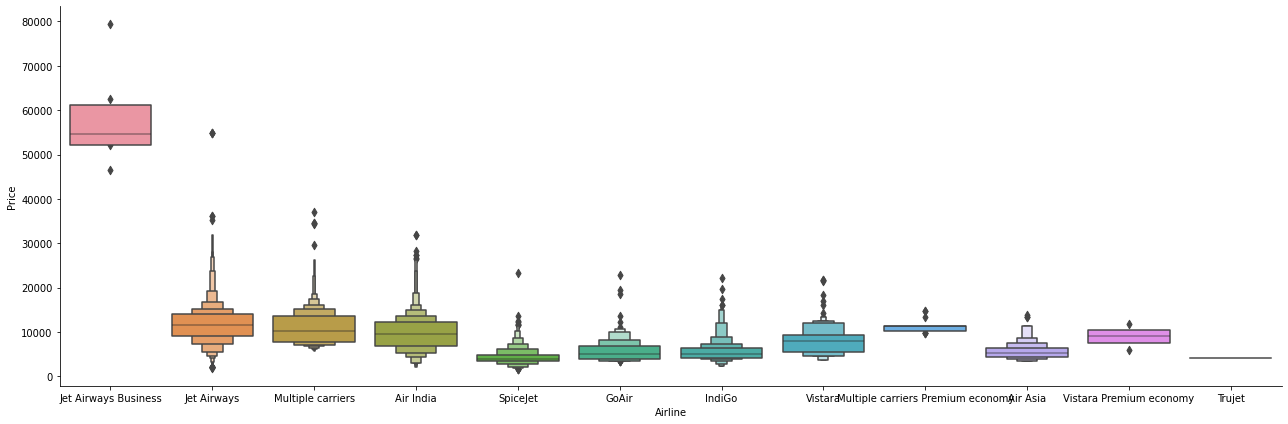

In [16]:
import seaborn as sns 
sns.catplot(y="Price",x="Airline",data=data_frame.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

This graph shows the Price difference with respect to the various airlines.This is used to find the outliers in the feature airlines

In [17]:
airline=data_frame["Airline"]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [18]:
#finding the uniquie values from the feature source
data_frame["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

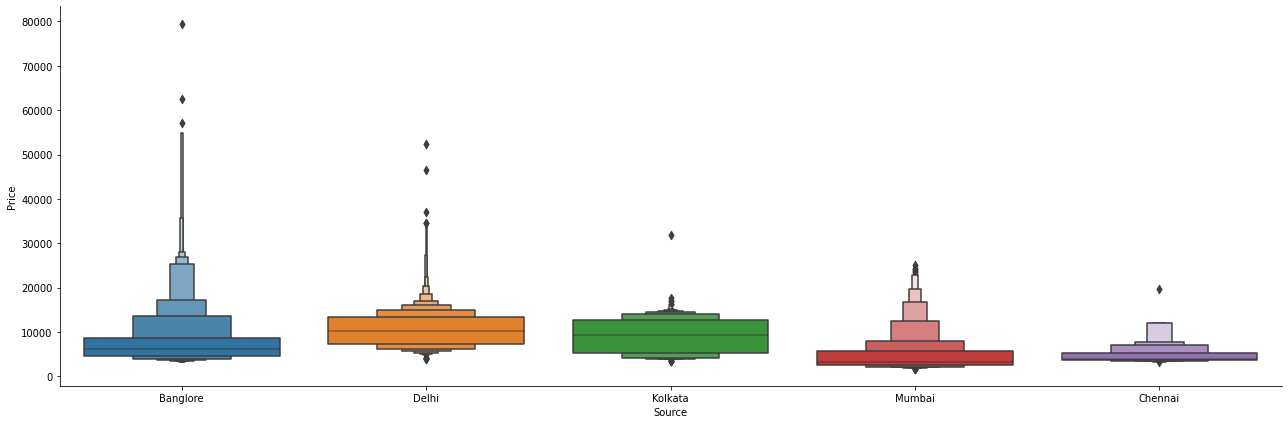

In [19]:
sns.catplot(y="Price",x="Source",data=data_frame.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

This graph shows the Price difference with respect to the departure of the airline.This is used to find the outliers in the feature source 

In [20]:
#performing one-hot encoding
data_source=data_frame["Source"]
data_source=pd.get_dummies(data_source,drop_first=True)
data_source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [21]:
#finding the uniquie values from the feature destination
data_frame["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

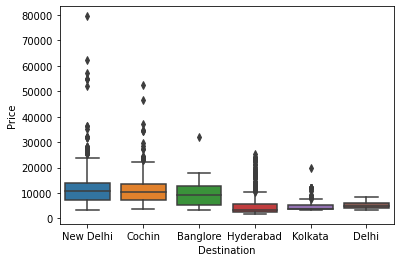

In [22]:
sns.boxplot(y="Price",x="Destination",data=data_frame.sort_values("Price",ascending=False))

This plot gives the most visited destination with respect to price of the airlines

In [23]:
#performing one-hot encoding
data_destination=data_frame["Destination"]
data_destination=pd.get_dummies(data_destination,drop_first=True)
data_destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [24]:
data_frame.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [25]:
#finding the uniquie values from the feature total stops
data_frame["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
data_frame.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

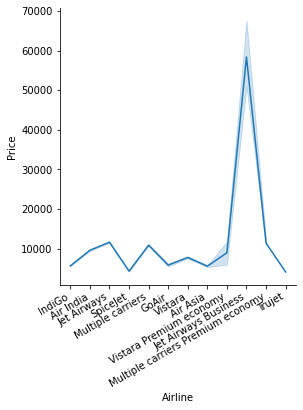

In [27]:
graph= sns.relplot(x="Airline", y="Price", kind="line", data=data_frame)
graph.fig.autofmt_xdate()

From the above graph the relation between various airlines based on the price details is infered.The jet airways business airlines is the highest compared to other airlines.

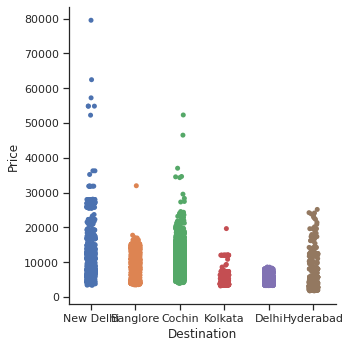

In [28]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Destination", y="Price", data=data_frame);

From the above graph the relation between various airlines based on the price details and destination of the flight is infered.The travel to New Delhi costs more than the other destinations.

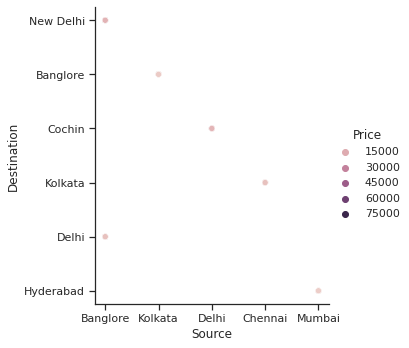

In [29]:
sns.relplot(x="Source", y="Destination", hue="Price", data=data_frame);

From the above graph the relation between various airlines based on the source and destination and derived the price of the flight.The travel to New Delhi from Banglore costs more than the other travels.

SPLITTING TRAIN AND TEST DATA

In [30]:
Train_Data=pd.concat([data_frame,airline,data_destination,data_source],axis=1)
Train_Data.head()

,Airline,Source,Destination,Total_Stops,Price,journy_date,journy_month,dep_hour,dep_minute,arrival_hour,...,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,1,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,1,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,1,0,0,0,0


In [31]:
Train_Data.drop(['Airline','Source','Destination'],axis=1,inplace=True)
Train_Data.head()
Train_Data.shape

(10682, 30)

In [32]:
Train_Data.head()

,Total_Stops,Price,journy_date,journy_month,dep_hour,dep_minute,arrival_hour,arrival_minute,duration_hour,duration_minute,...,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,1,0,0,0,0


In [33]:
Test_Data=pd.read_excel('/content/Test_set.xlsx')
Test_Data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Performing feature engineering for the test data seperately to avoid data leakage

In [34]:
print("Information about test data")
print(Test_Data.info())
print()
print()
print("."*100)
print("Going through the Null values :")

Test_Data.dropna(inplace = True)
print(Test_Data.isnull().sum())

# Date_of_Journey
Test_Data["Journey_day"] =pd.to_datetime(Test_Data['Date_of_Journey'],format= "%d/%m/%Y").dt.day
Test_Data["Journey_month"] = pd.to_datetime(Test_Data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
Test_Data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
Test_Data["Dep_hour"] = pd.to_datetime(Test_Data["Dep_Time"]).dt.hour
Test_Data["Dep_min"] = pd.to_datetime(Test_Data["Dep_Time"]).dt.minute
Test_Data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
Test_Data["Arrival_hour"] = pd.to_datetime(Test_Data.Arrival_Time).dt.hour
Test_Data["Arrival_min"] = pd.to_datetime(Test_Data.Arrival_Time).dt.minute
Test_Data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(Test_Data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Adding Duration column to test set
Test_Data["Duration_hours"] = duration_hours
Test_Data["Duration_mins"] = duration_mins
Test_Data.drop(["Duration"], axis = 1, inplace = True)


# Going through the Categorical Features
print("."*100)
print(" going through the Airline")

print(Test_Data["Airline"].value_counts())
Airline = pd.get_dummies(Test_Data["Airline"], drop_first= True)

print()

print("Source")
print("."*75)
print(Test_Data["Source"].value_counts())
Source = pd.get_dummies(Test_Data["Source"], drop_first= True)

print()

print("Going through the Destination")
print("."*100)
print(Test_Data["Destination"].value_counts())
Destination = pd.get_dummies(Test_Data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
Test_Data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
Test_Data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
# Concatenate dataframe --> data_test + Airline + Source + Destination
Test_Data = pd.concat([Test_Data, Airline, Source, Destination], axis = 1)

Test_Data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", Test_Data.shape)

Information about test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


....................................................................................................
Going through the Null values :
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time    

In [35]:
#spliting the x indendent and dependent variables from the dataset
Train_Data.columns
x=Train_Data.loc[:,['Total_Stops','journy_date', 'journy_month', 'dep_hour',
       'dep_minute', 'arrival_hour', 'arrival_minute', 'duration_hour',
       'duration_minute', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']]
x.head()
y=Train_Data.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

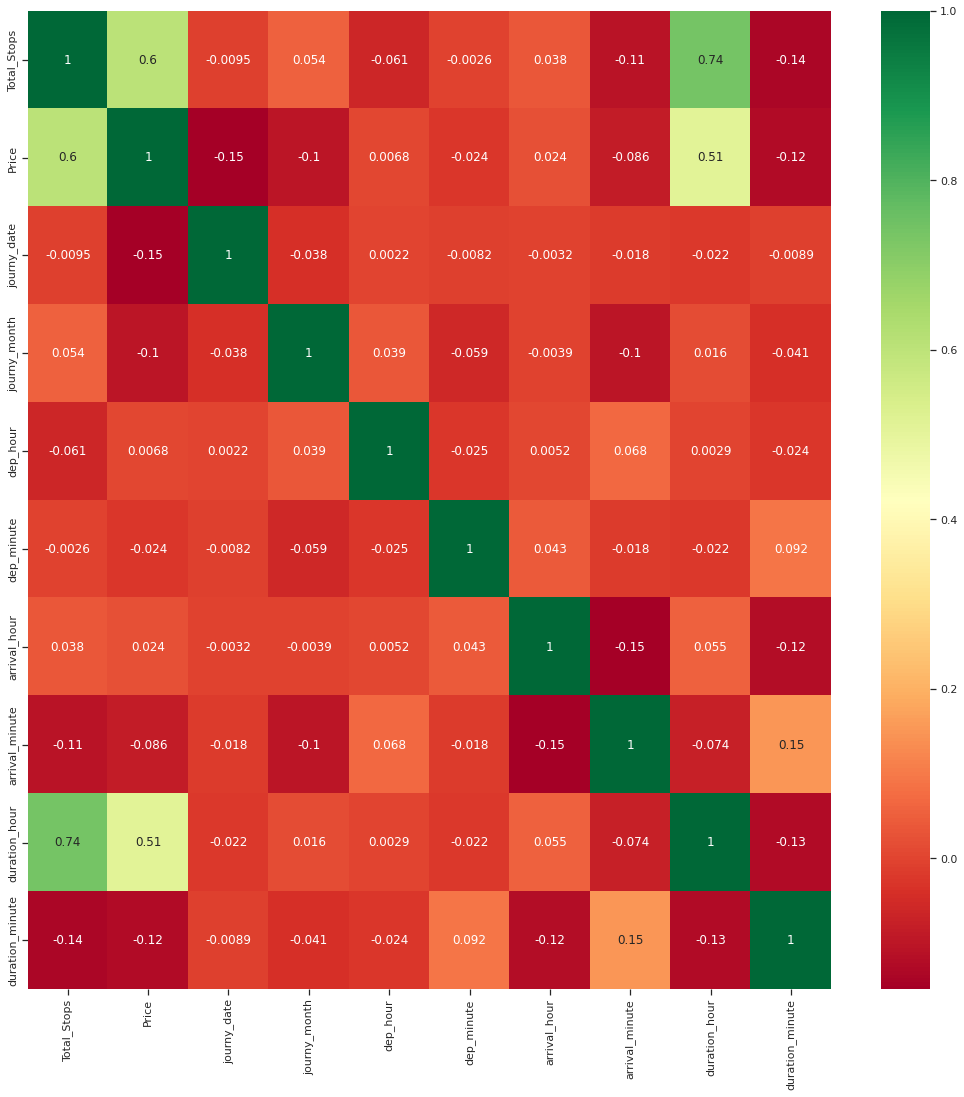

In [36]:
#Finding the correlation with the features
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18 ))
sns.heatmap(data_frame.corr(),annot=True,cmap="RdYlGn")

This heatmap shows the relationship between differnt features

Spliting the test and train data

In [37]:
#splting train and test data with train size as 70% and test size as 30% with random state 42
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.3,random_state=42)

### Training the model with KNN

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,recall_score
r2_scores = {}

def fit_and_evaluate(prediction_model):
    print(' Training the dataset with KNN algorithm')
    
    model= prediction_model.fit(x_train,y_train)
    print("Model Accuracy: {}".format(model.score(x_train,y_train)))
    

    predictions = model.predict(x_test)
    print("Predictions:\n",predictions)
    
    print('\n')
    
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
    r2_scores[f'{prediction_model}'] = r2score
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
 
    


In [39]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

#list which stores RMSE values for various K values 
accuracy = [] 

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test)
     #make prediction on test dataset
    accu= model.score(x_test,y_test) #calculate accuracy
    accuracy.append(accu) #store rmse values
    print('accuracy value for k= ' , K , 'is:', accu)
print(accuracy)


accuracy value for k=  1 is: 0.4562478810444993
accuracy value for k=  2 is: 0.5370231629182167
accuracy value for k=  3 is: 0.5482294957545886
accuracy value for k=  4 is: 0.5641789184927719
accuracy value for k=  5 is: 0.5689323008923752
accuracy value for k=  6 is: 0.5642520976209311
accuracy value for k=  7 is: 0.5552939193107999
accuracy value for k=  8 is: 0.551078985766058
accuracy value for k=  9 is: 0.5445986858589749
accuracy value for k=  10 is: 0.5412049622802114
accuracy value for k=  11 is: 0.5402742601116324
accuracy value for k=  12 is: 0.5341686536376893
accuracy value for k=  13 is: 0.5272226677869098
accuracy value for k=  14 is: 0.5228429038758877
accuracy value for k=  15 is: 0.5181173803956622
accuracy value for k=  16 is: 0.5157596298154161
accuracy value for k=  17 is: 0.5140866906592532
accuracy value for k=  18 is: 0.5114739873705243
accuracy value for k=  19 is: 0.5111222399242434
accuracy value for k=  20 is: 0.5085574721091137
[0.4562478810444993, 0.5370231

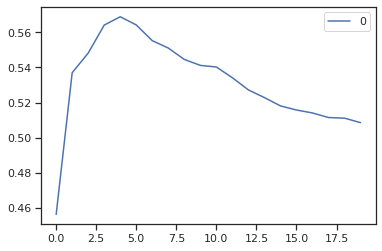

In [40]:
#plotting the accuracy against k values
curve = pd.DataFrame(accuracy) #elbow curve 
curve.plot()

This graph shows the differnt accuracy with respect to differnt K values

In [41]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2180.525553822153
MSE: 10025882.92945866
RMSE: 3166.3674659550584


## decision tree

In [42]:

from sklearn import tree
from sklearn.metrics import accuracy_score

In [43]:
#fitting th data with decision tree regressor algorithm
Decision_tree=tree.DecisionTreeRegressor()
Decision_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [44]:
#predicting the score of the model
pred = Decision_tree.predict(x_test)
Decision_tree.score(x_test,y_test)

0.7006465914109177

In [45]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1377.8049193967759
MSE: 6107086.909895822
RMSE: 2471.2520935541606


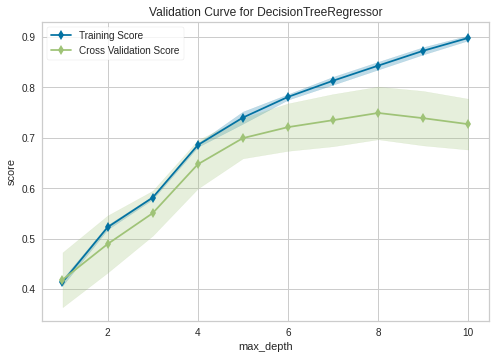

In [46]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.tree import DecisionTreeRegressor
#drawing the validation curve
val_curv = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
val_curv.fit(x_test,y_test)
val_curv.show()

This Plot shows the validation curve for DecisionTree Regressor

## Random Forest Regressor

In [47]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)
print(selection.feature_importances_)

[2.31486272e-01 1.44367019e-01 5.35231185e-02 2.44262103e-02
 2.13417915e-02 2.72719488e-02 1.90099693e-02 1.10426212e-01
 1.73189049e-02 9.04216460e-03 1.68040929e-03 1.68828257e-02
 1.48060604e-01 6.74053132e-02 2.03510128e-02 8.98753073e-04
 2.73860206e-03 9.75301405e-05 5.11105993e-03 8.75786652e-05
 1.03883734e-02 8.51937556e-03 6.69643746e-03 6.26902531e-03
 2.59480647e-04 1.65386130e-03 2.48002902e-02 3.18831106e-04
 4.95264472e-03 5.24825518e-03 3.43475837e-04 1.84846882e-03
 7.17418076e-03]


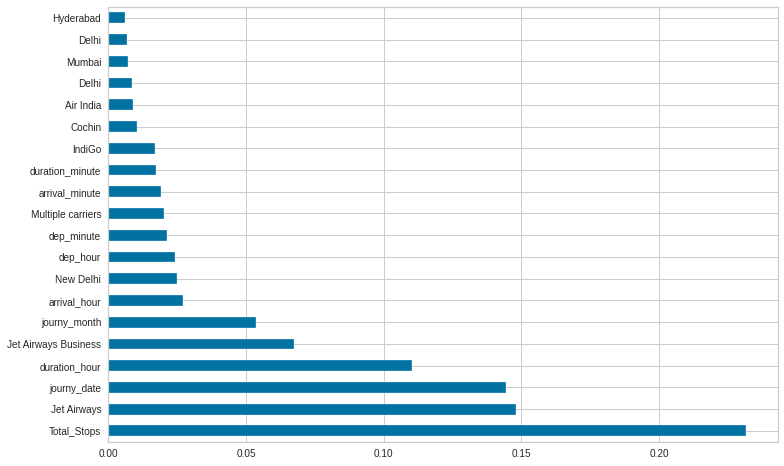

In [48]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
important_feature = pd.Series(selection.feature_importances_, index=x.columns)
important_feature.nlargest(20).plot(kind='barh')
plt.show()


This graph shows the importance of differnt features.

In [49]:
# fitting the data with random forest regressor
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

Performing HyperParameter tuning to obtain high accuracy

In [50]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
#accessing the best parameters
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [52]:
#training the model with best parameters
from sklearn.ensemble import RandomForestRegressor
reg_rf_hyp = RandomForestRegressor(max_depth=20,max_features='auto',min_samples_leaf=15,n_estimators=700)
reg_rf_hyp.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=15, n_estimators=700)

In [53]:
prediction =reg_rf_hyp.predict(x_test)

In [54]:
#predicting the score of the model
y_pred = reg_rf_hyp.predict(x_test)
reg_rf_hyp.score(x_train,y_train)
reg_rf_hyp.score(x_test,y_test)

0.8016288993237768

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


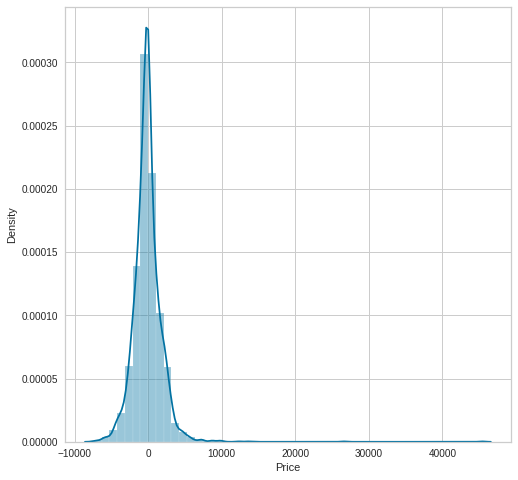

In [55]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1278.5294443932607
MSE: 4046954.260355038
RMSE: 2011.7043173277325
